In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

/home/antoine/homhots/HOTS/HOTS


In [2]:
import os
import pickle
import datetime
from mix_Network import *

dataset = 'nmnist'
records_path = '../Records'
timestr = datetime.datetime.now().date().isoformat()
timestr = '2021-01-27'

%mkdir -p ../Records
%mkdir -p ../Records/EXP_03_NMNIST

homeo = True
sigma = None
pooling = False
homeinv = False
jitonic = [None,None] #[temporal, spatial]
jitter = False
tau = 5
nb_train = 500
nb_test = 100
krnlinit = 'rdn'
nblay = 3
nbclust = 4
filt = 2

../Records/nmnist/models/2021-02-08_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8].pkl
83276


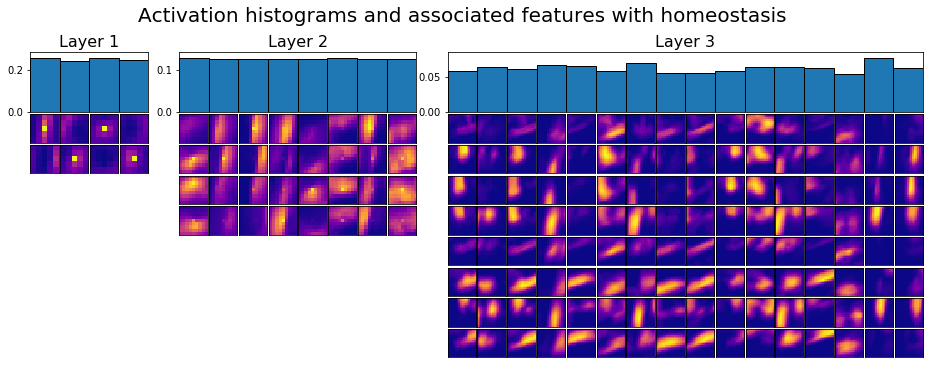

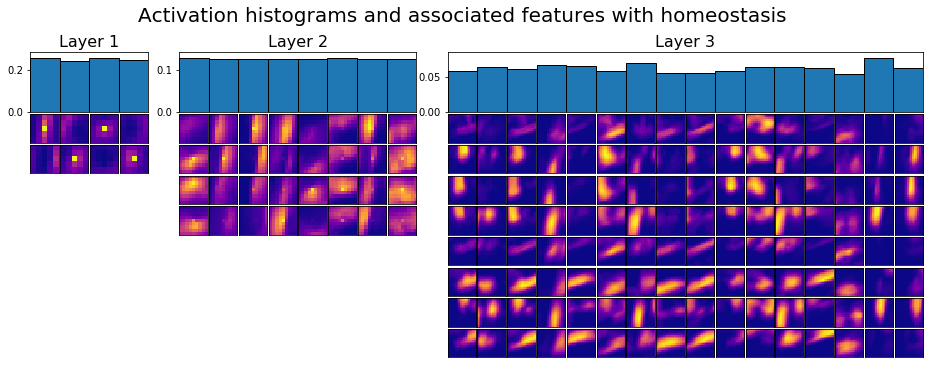

In [3]:
hotshom = network(krnlinit=krnlinit, filt=filt, tau=tau, nblay=nblay, nbclust=nbclust, homeo=homeo, sigma=sigma, homeinv=homeinv, jitter=jitter)
hotshom = hotshom.learningall(dataset=dataset)
hotshom.plotlayer()

In [4]:
trainmaphom = hotshom.running()

# Spatial Jitter only on the classification

In [5]:
for i in np.arange(0,30,0.5):
    i = round(i,1)
    jitonic = [None,i]
    trainmaphom = hotshom.running(train=False, nb_digit=100, jitonic=jitonic)

spatial jitter -> var = 12.0
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 12.5
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 13.0
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 13.5
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 14.0
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 14.5
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 15.0
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 15.5
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 16.0
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 16.5
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 17.0
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 17.5
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 18.0
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 18.5
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 19.0
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 19.5
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 20.0
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 20.5
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 21.0
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 21.5
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 22.0
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 22.5
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 23.0
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 23.5
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 24.0
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 24.5
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 25.0
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 25.5
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 26.0
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 26.5
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 27.0
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 27.5
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 28.0
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 28.5
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 29.0
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

spatial jitter -> var = 29.5
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

# Temporal Jitter only on the classification

In [6]:
for i in np.arange(0,20000,500):
    i = round(i,1)
    jitonic = [i,None]
    trainmaphom = hotshom.running(train=False, nb_digit=100, jitonic=jitonic)

time jitter -> var = 0
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 500
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 1000
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 1500
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 2000
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 2500
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 3000
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 3500
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 4000
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 4500
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 5000
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 5500
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 6000
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 6500
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 7000
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 7500
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 8000
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 8500
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 9000
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 9500
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 10000
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 10500
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 11000
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 11500
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 12000
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 12500
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 13000
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 13500
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 14000
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 14500
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 15000
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 15500
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 16000
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 16500
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 17000
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 17500
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 18000
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 18500
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 19000
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

time jitter -> var = 19500
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  0%|          | 0/100 [00:00<?, ?it/s]

In [7]:
for i in np.arange(6200,10000,500):
    i = round(i,1)
    jitonic = [i,None]
    makehisto(filt, tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test, jitonic);

NameError: name 'makehisto' is not defined